# Clasyfication

In [1]:
import numpy as np
import pandas as pd

Load data from `sklearn`

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", version=1, as_frame=False)

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X, y = mnist['data'], mnist["target"]

In [5]:
X = X / 256.

In [6]:
y = y.astype(int)

In [7]:
(pd.Series(y).value_counts()).sort_index()

0    6903
1    7877
2    6990
3    7141
4    6824
5    6313
6    6876
7    7293
8    6825
9    6958
dtype: int64

In [8]:
(pd.Series(y).value_counts()/y.shape[0]).sort_index()

0    0.098614
1    0.112529
2    0.099857
3    0.102014
4    0.097486
5    0.090186
6    0.098229
7    0.104186
8    0.097500
9    0.099400
dtype: float64

<AxesSubplot:>

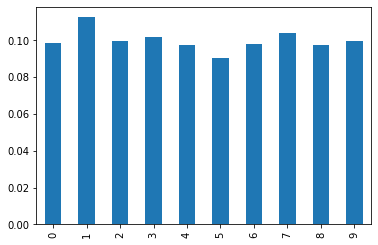

In [9]:
(pd.Series(y).value_counts()/y.shape[0]).sort_index().plot(kind='bar')

In [10]:
print(f"Data Type: {type(X)}\nX shape: {X.shape}\ny shape: {y.shape}")

Data Type: <class 'numpy.ndarray'>
X shape: (70000, 784)
y shape: (70000,)


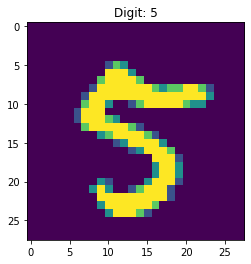

In [11]:
import matplotlib.pyplot as plt

def plot_digit(idx):
    ex_digit = X[idx].reshape(28, 28)

    plt.imshow(ex_digit)
    plt.title(f"Digit: {y[idx]}")
    plt.show()

plot_digit(512)

In [12]:
y = (y == 5).astype(int)

<AxesSubplot:>

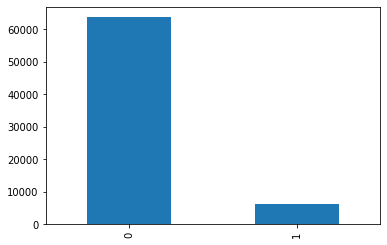

In [13]:
pd.Series(y).value_counts().plot.bar()

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,   # define test size as 20% of X
                                                    shuffle=True,    # shuffle data before spliting (default True)
                                                    random_state=42, # set randomisation
                                                    stratify=y       # keep same distribution in test and train according to y (default y)
                                                   )


Distribution of y_train:


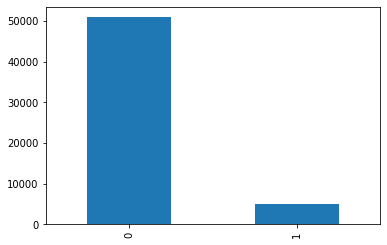


Distribution of y_test:


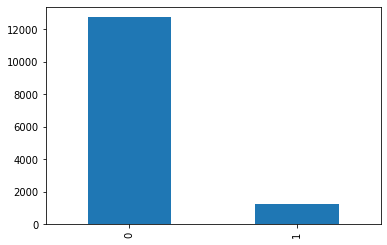

In [16]:
print("Distribution of y_train:")
pd.Series(y_train).value_counts().plot.bar()
plt.show()
print()
print("Distribution of y_test:")
pd.Series(y_test).value_counts().plot.bar()
plt.show()

In [17]:
X_train.shape

(56000, 784)

# Dummy Prediction

Create custom dummy estimator.

More details about custom estimators and transformers:
> guide: https://scikit-learn.org/dev/developers/develop.html

> template: https://github.com/scikit-learn-contrib/project-template/blob/master/skltemplate/_template.py

In [19]:
import numpy as np
from sklearn.base import BaseEstimator
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted

# Create dummie 

class DummyEstimator(BaseEstimator):
    # Estimator should contain `fit` and `predict` method

    def __init__(self, demo_param='demo_param'):
        # keep the same variable name as class variable name
        self.demo_param = demo_param

    def fit(self, X, y):

        X, y = check_X_y(X, y, accept_sparse=True)
        self.is_fitted_ = True
        # `fit` should always return `self` !!!
        return self

    def predict(self, X):
        X = check_array(X, accept_sparse=True)
        check_is_fitted(self, 'is_fitted_')
        return np.zeros(X.shape[0], dtype=np.int64)

In [20]:
from sklearn.metrics import accuracy_score

model = DummyEstimator()
model.fit(X_train, y_train)

DummyEstimator()

In [21]:
y_pred = model.predict(X_test)

In [23]:
# Check dummy model performance:

acc = y_test == y_pred
print(acc.sum())
print(acc.shape)

print(f"% of correct data: {acc.sum()/acc.shape[0]}")

12737
(14000,)
% of correct data: 0.9097857142857143


> use `sklearn`

In [24]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9097857142857143

[[12737     0]
 [ 1263     0]]

TN: 12737
FP: 0
FN: 1263
TP: 0


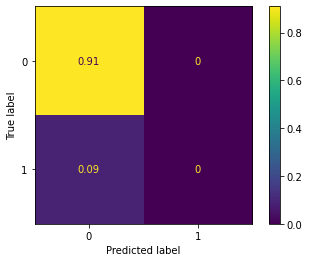

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print("")
print(f"TN: {tn}")
print(f"FP: {fp}")
print(f"FN: {fn}")
print(f"TP: {tp}")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='all')
plt.show()

In [29]:
from sklearn.metrics import precision_score, recall_score
print(f"Precision {precision_score(y_test, y_pred)}")
print(f"Recall {recall_score(y_test, y_pred)}")

Precision 0.0
Recall 0.0


/Users/kamilpabijan/Documents/SDA/Learning_repo/venv_app/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
from sklearn.metrics import f1_score
print(f"F1 score: {f1_score(y_test, y_pred)}")

F1 score: 0.0


In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     12737
           1       0.00      0.00      0.00      1263

    accuracy                           0.91     14000
   macro avg       0.45      0.50      0.48     14000
weighted avg       0.83      0.91      0.87     14000



# Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
clf = LogisticRegression(random_state=42, max_iter=500)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Confusion Matrix

[[12627   110]
 [  240  1023]]

TN: 12627
FP: 110
FN: 240
TP: 1023


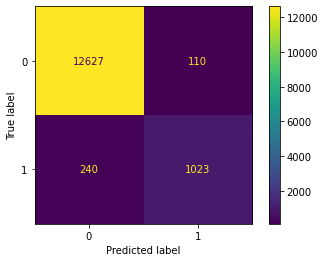

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print()
print(f"TN: {tn}")
print(f"FP: {fp}")
print(f"FN: {fn}")
print(f"TP: {tp}")

#### MATRIX ROTATED!!!
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()


In [38]:
from sklearn.metrics import precision_score, recall_score
print(f"Precision {precision_score(y_test, y_pred)}")
print(f"Recall {recall_score(y_test, y_pred)}")

Precision 0.9029126213592233
Recall 0.8099762470308789


In [39]:
from sklearn.metrics import f1_score
print(f"F1 score: {f1_score(y_test, y_pred)}")

F1 score: 0.8539232053422371


In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     12737
           1       0.90      0.81      0.85      1263

    accuracy                           0.97     14000
   macro avg       0.94      0.90      0.92     14000
weighted avg       0.97      0.97      0.97     14000



In [41]:
clf.decision_function(X_train)

array([ -9.79976953,  -4.26080383,  -4.3785281 , ..., -10.1359551 ,
        -9.68444628,  -5.46005539])

In [42]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, clf.decision_function(X_train))

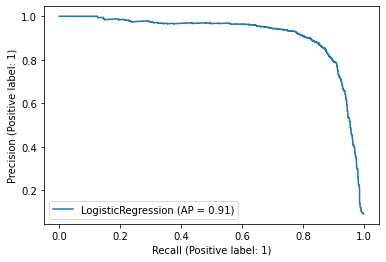

In [43]:
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_estimator(clf, X_test, y_test)

In [49]:
clf.coef_.shape

(1, 784)

In [51]:
clf.intercept_

array([0.17878402])

In [53]:
clf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [52]:
clf.predict_proba(X_test)

array([[9.99972576e-01, 2.74244410e-05],
       [9.99922223e-01, 7.77772709e-05],
       [9.95063147e-01, 4.93685258e-03],
       ...,
       [9.99904203e-01, 9.57967759e-05],
       [9.96527180e-01, 3.47281967e-03],
       [9.98858814e-01, 1.14118590e-03]])

In [61]:
clf.decision_function(X_test)

array([-9.8400087 , -8.28550254, -4.86067636, ..., -8.37663397,
       -4.35844464, -6.22555612])

<hr>

In [54]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42, loss='log')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     12737
           1       0.88      0.83      0.86      1263

    accuracy                           0.97     14000
   macro avg       0.93      0.91      0.92     14000
weighted avg       0.97      0.97      0.97     14000



In [55]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve

y_scores = cross_val_predict(clf, X_train, y_train, cv=3,
                             method="decision_function")

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

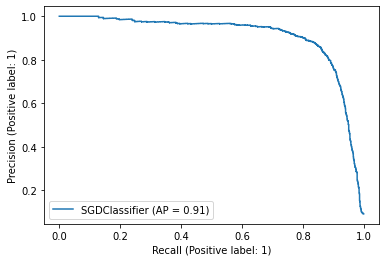

In [56]:
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_estimator(clf, X_test, y_test)

In [57]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

In [58]:
thresholds


array([ 13.76179776,  12.76179776,   8.84765784, ..., -21.71887187,
       -21.74149967, -39.85976377])

In [59]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train, y_scores)

0.9712959822773248

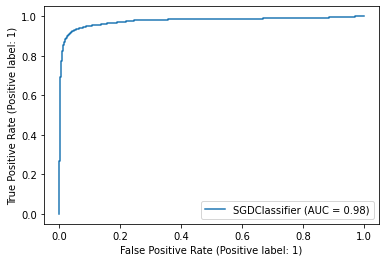

In [60]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(clf, X_test, y_test)